In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
PNS_PATH = '../../PNS/data/processed/pns_2013.csv'
df = pd.read_csv(PNS_PATH, low_memory=False)

In [3]:
df

,[V0001] Unidade da Federação,[V0024] Estrato,[UPA_PNS] UPA,[V0006_PNS] Número de ordem do domicílio na PNS,[UPA] UPA,[V0015] Tipo de entrevista,[V0020] Ano de referência,[V0022] Total de moradores,[V0026] Tipo de situação censitária,[V0031] Tipo de área,...,[V00293] Domínio de projeção para morador selecionado,"[VDC001] ""Número de componentes do domicílio (exclusive as pessoas cuja condição na família era pensionista, empregado doméstico ou parente do empregado doméstico) """,[VDC002] Total de moradores com 18 anos ou mais,[VDD004] Nível de instrução mais elevado alcançado (pessoas de 5 anos ou mais de idade) - SISTEMA DE 8 ANOS,[VDD004A] Nível de instrução mais elevado alcançado (pessoas de 5 anos ou mais de idade) padronizado para o Ensino Fundamental - SISTEMA DE 9 ANOS,[VDE001] Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade,[VDE002] Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade,"[VDF002] ""Rendimento domiciliar (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)""","[VDF003] ""Rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)""","[VDDATA] ""Data de geração do arquivo de microdados. Data ordenada na forma: ano (4 algarismos), mês (2) e dia (2) - AAAAMMDD"""
0,Rondônia,1110011,1100002,1,110021877,TIPO A - Realizada,2013,4,Urbano,Capital,...,11112.0,4.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,840.0,210.0,20200715
1,Rondônia,1110011,1100002,1,110021877,TIPO A - Realizada,2013,4,Urbano,Capital,...,NaN,4.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas fora da força de trabalho,NaN,840.0,210.0,20200715
2,Rondônia,1110011,1100002,1,110021877,TIPO A - Realizada,2013,4,Urbano,Capital,...,NaN,4.0,2,NaN,NaN,NaN,NaN,840.0,210.0,20200715
3,Rondônia,1110011,1100002,1,110021877,TIPO A - Realizada,2013,4,Urbano,Capital,...,NaN,4.0,2,Médio incompleto ou equivalente,Médio incompleto ou equivalente,Pessoas fora da força de trabalho,NaN,840.0,210.0,20200715
4,Rondônia,1110011,1100002,2,110021877,TIPO A - Realizada,2013,2,Urbano,Capital,...,11113.0,2.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,1000.0,500.0,20200715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205541,Distrito Federal,5310220,5300173,12,530024071,TIPO A - Realizada,2013,3,Rural,Capital,...,NaN,3.0,2,Fundamental completo ou equivalente,Fundamental completo ou equivalente,Pessoas fora da força de trabalho,NaN,1939.0,646.0,20200715
205542,Distrito Federal,5310220,5300173,13,530024071,TIPO A - Realizada,2013,4,Rural,Capital,...,53222.0,4.0,2,Superior incompleto ou equivalente,Superior incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,8950.0,2238.0,20200715
205543,Distrito Federal,5310220,5300173,13,530024071,TIPO A - Realizada,2013,4,Rural,Capital,...,NaN,4.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,8950.0,2238.0,20200715
205544,Distrito Federal,5310220,5300173,13,530024071,TIPO A - Realizada,2013,4,Rural,Capital,...,NaN,4.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas fora da força de trabalho,NaN,8950.0,2238.0,20200715


In [4]:
cols = df.columns.to_list()
col_code = [col.split(']')[0][1:] for col in cols]

In [5]:
code_to_desc = dict(zip(col_code, cols))

In [6]:
code_to_desc

{'V0001': '[V0001] Unidade da Federação',
 'V0024': '[V0024] Estrato',
 'UPA_PNS': '[UPA_PNS] UPA',
 'V0006_PNS': '[V0006_PNS] Número de ordem do domicílio na PNS',
 'UPA': '[UPA] UPA',
 'V0015': '[V0015] Tipo de entrevista',
 'V0020': '[V0020] Ano de referência',
 'V0022': '[V0022] Total de moradores',
 'V0026': '[V0026] Tipo de situação censitária',
 'V0031': '[V0031] Tipo de área',
 'V0025': '[V0025] Seleção do morador de 18 anos ou mais para responder o questionário individual',
 'A001': '[A001] Este domicílio é do tipo:',
 'A002': '[A002] Qual o material que predomina na construção das paredes externas deste domicílio?',
 'A003': '[A003] Qual o material que predomina na cobertura (telhado) do domicílio?',
 'A004': '[A004] Qual o material que predomina no piso do domicílio?',
 'A005': '[A005] Qual é a principal forma de abastecimento de água deste domicílio? ',
 'A006': '[A006] Com que frequência a água proveniente da rede geral está habitualmente disponível para este domicílio?',


In [7]:
df.columns = col_code

In [8]:
df.columns

Index(['V0001', 'V0024', 'UPA_PNS', 'V0006_PNS', 'UPA', 'V0015', 'V0020',
       'V0022', 'V0026', 'V0031',
       ...
       'V00293', 'VDC001', 'VDC002', 'VDD004', 'VDD004A', 'VDE001', 'VDE002',
       'VDF002', 'VDF003', 'VDDATA'],
      dtype='object', length=1000)

In [9]:
df

,V0001,V0024,UPA_PNS,V0006_PNS,UPA,V0015,V0020,V0022,V0026,V0031,...,V00293,VDC001,VDC002,VDD004,VDD004A,VDE001,VDE002,VDF002,VDF003,VDDATA
0,Rondônia,1110011,1100002,1,110021877,TIPO A - Realizada,2013,4,Urbano,Capital,...,11112.0,4.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,840.0,210.0,20200715
1,Rondônia,1110011,1100002,1,110021877,TIPO A - Realizada,2013,4,Urbano,Capital,...,NaN,4.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas fora da força de trabalho,NaN,840.0,210.0,20200715
2,Rondônia,1110011,1100002,1,110021877,TIPO A - Realizada,2013,4,Urbano,Capital,...,NaN,4.0,2,NaN,NaN,NaN,NaN,840.0,210.0,20200715
3,Rondônia,1110011,1100002,1,110021877,TIPO A - Realizada,2013,4,Urbano,Capital,...,NaN,4.0,2,Médio incompleto ou equivalente,Médio incompleto ou equivalente,Pessoas fora da força de trabalho,NaN,840.0,210.0,20200715
4,Rondônia,1110011,1100002,2,110021877,TIPO A - Realizada,2013,2,Urbano,Capital,...,11113.0,2.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,1000.0,500.0,20200715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205541,Distrito Federal,5310220,5300173,12,530024071,TIPO A - Realizada,2013,3,Rural,Capital,...,NaN,3.0,2,Fundamental completo ou equivalente,Fundamental completo ou equivalente,Pessoas fora da força de trabalho,NaN,1939.0,646.0,20200715
205542,Distrito Federal,5310220,5300173,13,530024071,TIPO A - Realizada,2013,4,Rural,Capital,...,53222.0,4.0,2,Superior incompleto ou equivalente,Superior incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,8950.0,2238.0,20200715
205543,Distrito Federal,5310220,5300173,13,530024071,TIPO A - Realizada,2013,4,Rural,Capital,...,NaN,4.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,8950.0,2238.0,20200715
205544,Distrito Federal,5310220,5300173,13,530024071,TIPO A - Realizada,2013,4,Rural,Capital,...,NaN,4.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas fora da força de trabalho,NaN,8950.0,2238.0,20200715


In [10]:
columns_to_drop = ['V0024', 'UPA_PNS', 'V0006_PNS', 'UPA', 'V0015', 'V0020', 'VDDATA']
df.drop(columns_to_drop, axis=1, inplace=True)

In [11]:
df

,V0001,V0022,V0026,V0031,V0025,A001,A002,A003,A004,A005,...,V00283,V00293,VDC001,VDC002,VDD004,VDD004A,VDE001,VDE002,VDF002,VDF003
0,Rondônia,4,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,111,11112.0,4.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,840.0,210.0
1,Rondônia,4,Urbano,Capital,Não selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,111,NaN,4.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas fora da força de trabalho,NaN,840.0,210.0
2,Rondônia,4,Urbano,Capital,Não selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,111,NaN,4.0,2,NaN,NaN,NaN,NaN,840.0,210.0
3,Rondônia,4,Urbano,Capital,Não selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,111,NaN,4.0,2,Médio incompleto ou equivalente,Médio incompleto ou equivalente,Pessoas fora da força de trabalho,NaN,840.0,210.0
4,Rondônia,2,Urbano,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,111,11113.0,2.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,1000.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205541,Distrito Federal,3,Rural,Capital,Não selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Rede geral de distribuição,...,532,NaN,3.0,2,Fundamental completo ou equivalente,Fundamental completo ou equivalente,Pessoas fora da força de trabalho,NaN,1939.0,646.0
205542,Distrito Federal,4,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Rede geral de distribuição,...,532,53222.0,4.0,2,Superior incompleto ou equivalente,Superior incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,8950.0,2238.0
205543,Distrito Federal,4,Rural,Capital,Não selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Rede geral de distribuição,...,532,NaN,4.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,8950.0,2238.0
205544,Distrito Federal,4,Rural,Capital,Não selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Rede geral de distribuição,...,532,NaN,4.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas fora da força de trabalho,NaN,8950.0,2238.0


In [12]:
def code_of_desc(value):
    """
    Extracts the code from description
    
    example: 
    code_of_desc('[V0001] Unidade da Federação') -> 'V0001'
    """
    if isinstance(value, str):
        return value.split(']')[0][1:]
    elif isinstance(value, list):
        return [i.split(']')[0][1:] for i in value]
    else:
        return None

def cols_contains(name):
    """
    Return columns codes which contains the substring
    
    example: 
    cols contains('federação') -> '[V0001] Unidade da Federação'
    """
    return [code_of_desc(c) for c in list(code_to_desc.values()) if name in c.lower()]

In [13]:
depression_cols = cols_contains('depressão')
for col in depression_cols:
    print (code_to_desc[col])

[Q092] Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?
[Q093] Que idade o(a) Sr(a) tinha no primeiro diagnóstico de depressão? (0 =  Menos de 1 ano) (Branco = Não aplicável)
[Q094] O(a) Sr(a) vai ao médico/serviço de saúde regularmente por causa da depressão?
[Q095] Qual o principal motivo do(a) Sr(a) não visitar o médico/serviço de saúde regularmente por causa da depressão?
[Q09601] O(A) Sr(a) faz dieta atualmente por causa da depressão?
[Q09602] O(A) Sr(a) faz fisioterapia atualmente por causa da depressão?
[Q097] Algum dos medicamentos para depressão foi coberto por plano de saúde?
[Q098] Algum dos medicamentos para depressão foi obtido em serviço público de saúde?
[Q101] Quando foi a última vez que o(a) Sr(a) recebeu assistência médica por causa da depressão?
[Q102] "Na última vez que recebeu assistência médica para depressão, onde o(a) Sr(a) foi atendido?"
[Q106] "Em algum dos atendimentos para depressão, houve enc

In [14]:
depression_cols

['Q092',
 'Q093',
 'Q094',
 'Q095',
 'Q09601',
 'Q09602',
 'Q097',
 'Q098',
 'Q101',
 'Q102',
 'Q106',
 'Q109']

In [15]:
df.drop(depression_cols[1:], axis=1, inplace=True)

In [16]:
df

,V0001,V0022,V0026,V0031,V0025,A001,A002,A003,A004,A005,...,V00283,V00293,VDC001,VDC002,VDD004,VDD004A,VDE001,VDE002,VDF002,VDF003
0,Rondônia,4,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,111,11112.0,4.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,840.0,210.0
1,Rondônia,4,Urbano,Capital,Não selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,111,NaN,4.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas fora da força de trabalho,NaN,840.0,210.0
2,Rondônia,4,Urbano,Capital,Não selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,111,NaN,4.0,2,NaN,NaN,NaN,NaN,840.0,210.0
3,Rondônia,4,Urbano,Capital,Não selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,111,NaN,4.0,2,Médio incompleto ou equivalente,Médio incompleto ou equivalente,Pessoas fora da força de trabalho,NaN,840.0,210.0
4,Rondônia,2,Urbano,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,111,11113.0,2.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,1000.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205541,Distrito Federal,3,Rural,Capital,Não selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Rede geral de distribuição,...,532,NaN,3.0,2,Fundamental completo ou equivalente,Fundamental completo ou equivalente,Pessoas fora da força de trabalho,NaN,1939.0,646.0
205542,Distrito Federal,4,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Rede geral de distribuição,...,532,53222.0,4.0,2,Superior incompleto ou equivalente,Superior incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,8950.0,2238.0
205543,Distrito Federal,4,Rural,Capital,Não selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Rede geral de distribuição,...,532,NaN,4.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,8950.0,2238.0
205544,Distrito Federal,4,Rural,Capital,Não selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Rede geral de distribuição,...,532,NaN,4.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas fora da força de trabalho,NaN,8950.0,2238.0


In [17]:
na = df.Q092.isna()

In [18]:
df = df.drop(na[na == True].index)

In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
df

,V0001,V0022,V0026,V0031,V0025,A001,A002,A003,A004,A005,...,V00283,V00293,VDC001,VDC002,VDD004,VDD004A,VDE001,VDE002,VDF002,VDF003
0,Rondônia,4,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,111,11112.0,4.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,840.0,210.0
1,Rondônia,2,Urbano,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,111,11113.0,2.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,1000.0,500.0
2,Rondônia,3,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,"""Cerâmica, lajota ou pedra""",Poço ou nascente na propriedade,...,111,11122.0,3.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas fora da força de trabalho,NaN,4178.0,1393.0
3,Rondônia,2,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,111,11122.0,2.0,1,Fundamental completo ou equivalente,Fundamental completo ou equivalente,Pessoas fora da força de trabalho,NaN,300.0,150.0
4,Rondônia,3,Urbano,Capital,Selecionada,Casa,Taipa não revestida,Telha,Cimento,Poço ou nascente na propriedade,...,111,11113.0,3.0,2,Sem instrução,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,2000.0,667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60197,Distrito Federal,3,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Poço ou nascente fora da propriedade,...,532,53224.0,3.0,2,Médio incompleto ou equivalente,Médio incompleto ou equivalente,Pessoas fora da força de trabalho,NaN,1800.0,600.0
60198,Distrito Federal,3,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Rede geral de distribuição,...,532,53222.0,3.0,1,Fundamental completo ou equivalente,Fundamental completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,634.0,211.0
60199,Distrito Federal,3,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Rede geral de distribuição,...,532,53222.0,3.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas desocupadas,2100.0,700.0
60200,Distrito Federal,3,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Rede geral de distribuição,...,532,53213.0,3.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas na força de trabalho,Pessoas Ocupadas,1939.0,646.0


In [21]:
def select_by_code(self, code):
    return df[col_starts_with(self, code)]

df.select_by_code = select_by_code

In [22]:
df[df.Q092 == 'Sim']['V0001'].value_counts()

São Paulo              441
Minas Gerais           402
Rio Grande do Sul      375
Paraná                 348
Santa Catarina         223
Rio de Janeiro         203
Pernambuco             187
Goiás                  182
Mato Grosso do Sul     174
Distrito Federal       133
Rio Grande do Norte    132
Ceará                  130
Alagoas                118
Tocantins              110
Bahia                  108
Espírito Santo         107
Sergipe                103
Paraíba                103
Acre                    96
Mato Grosso             85
Piauí                   84
Rondônia                78
Roraima                 77
Amazonas                68
Maranhão                63
Pará                    54
Amapá                   51
Name: V0001, dtype: int64

In [23]:
df[df.Q092 == 'Não']['V0001'].value_counts()

São Paulo              4864
Minas Gerais           3377
Rio de Janeiro         3283
Paraná                 2664
Rio Grande do Sul      2538
Bahia                  2533
Amazonas               2518
Ceará                  2430
Pernambuco             2404
Goiás                  2241
Pará                   1950
Paraíba                1840
Piauí                  1720
Acre                   1718
Maranhão               1711
Distrito Federal       1678
Mato Grosso do Sul     1635
Alagoas                1630
Espírito Santo         1617
Rondônia               1616
Rio Grande do Norte    1559
Roraima                1514
Sergipe                1450
Tocantins              1405
Santa Catarina         1400
Mato Grosso            1391
Amapá                  1281
Name: V0001, dtype: int64

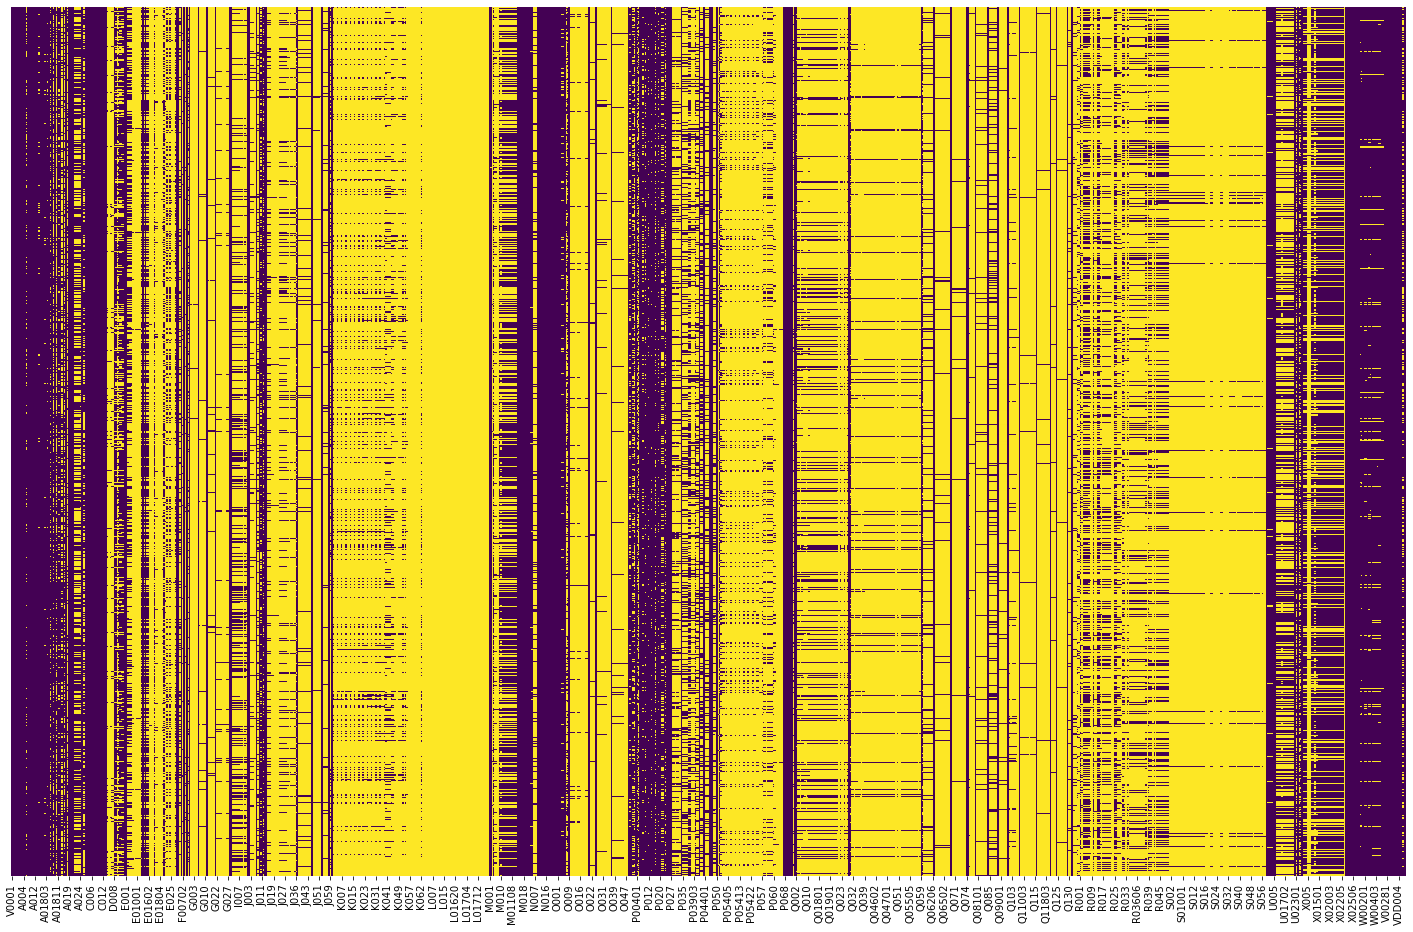

In [24]:
plt.figure(figsize=(25,16))
ax = sb.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
df2 = df.dropna(axis=1, thresh=len(df)*0.75)

In [26]:
df2

,V0001,V0022,V0026,V0031,V0025,A001,A002,A003,A004,A005,...,V00292,V00283,V00293,VDC001,VDC002,VDD004,VDD004A,VDE001,VDF002,VDF003
0,Rondônia,4,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,65453.190818,111,11112.0,4.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,840.0,210.0
1,Rondônia,2,Urbano,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,47487.375127,111,11113.0,2.0,2,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,1000.0,500.0
2,Rondônia,3,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,"""Cerâmica, lajota ou pedra""",Poço ou nascente na propriedade,...,63720.427182,111,11122.0,3.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas fora da força de trabalho,4178.0,1393.0
3,Rondônia,2,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,63720.427182,111,11122.0,2.0,1,Fundamental completo ou equivalente,Fundamental completo ou equivalente,Pessoas fora da força de trabalho,300.0,150.0
4,Rondônia,3,Urbano,Capital,Selecionada,Casa,Taipa não revestida,Telha,Cimento,Poço ou nascente na propriedade,...,47487.375127,111,11113.0,3.0,2,Sem instrução,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,2000.0,667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60197,Distrito Federal,3,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Poço ou nascente fora da propriedade,...,177647.400000,532,53224.0,3.0,2,Médio incompleto ou equivalente,Médio incompleto ou equivalente,Pessoas fora da força de trabalho,1800.0,600.0
60198,Distrito Federal,3,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Rede geral de distribuição,...,366034.300000,532,53222.0,3.0,1,Fundamental completo ou equivalente,Fundamental completo ou equivalente,Pessoas na força de trabalho,634.0,211.0
60199,Distrito Federal,3,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Rede geral de distribuição,...,366034.300000,532,53222.0,3.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas na força de trabalho,2100.0,700.0
60200,Distrito Federal,3,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Rede geral de distribuição,...,324806.000000,532,53213.0,3.0,2,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas na força de trabalho,1939.0,646.0


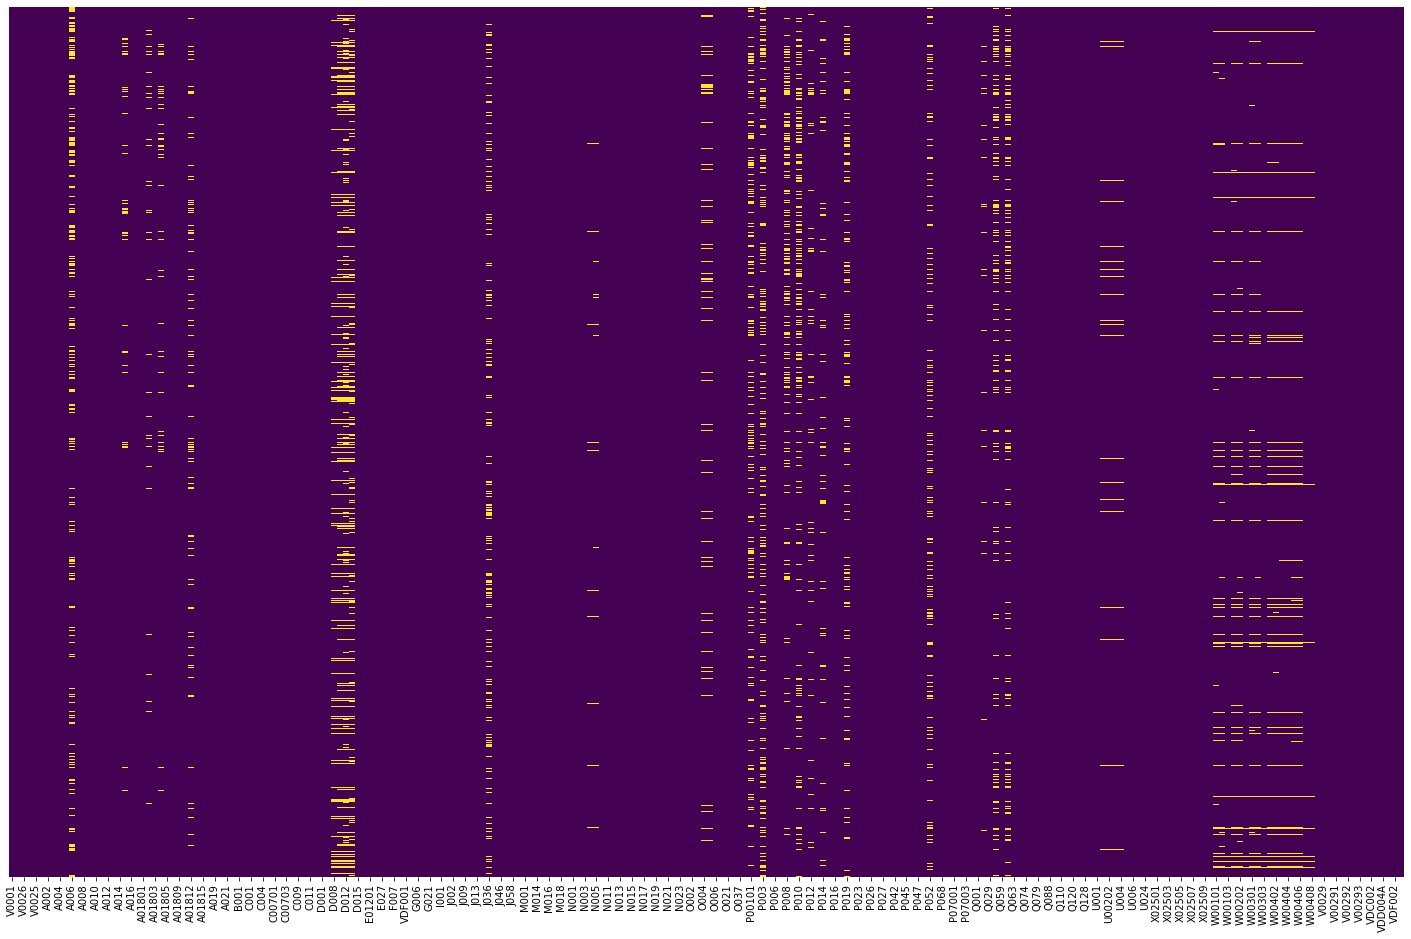

In [27]:
plt.figure(figsize=(25,16))
ax = sb.heatmap(df2.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
df2.V0022.unique()

array([ 4,  2,  3,  1,  5,  6,  9,  7,  8, 12, 10, 16, 14, 11, 13, 15, 22,
       20])

In [29]:
def numerical_to_categorical(serie):
    """
    Transform a series of numerical data into categorical data with labels lower than Q1, between Q1 and Q3, greater than Q3
    """
    intervals = serie.quantile([0.25, 0.75]).to_list()
    
    return serie.apply(lambda v: num_to_label(v, intervals))
    
def num_to_label(value, intervals):
    if isinstance(value, str):
        return value
    elif value <= intervals[0]:
        return 'Menor que ' + str(intervals[0])
    elif value > intervals[0] and value <= intervals[1]:
        return 'Entre ' + str(intervals[0]) + ' e ' + str(intervals[1])
    elif value > intervals[1]:
        return 'Maior que ' + str(intervals[1])
    else:
        None

numerical_to_categorical(df2.V0022)

0        Entre 2.0 e 4.0
1          Menor que 2.0
2        Entre 2.0 e 4.0
3          Menor que 2.0
4        Entre 2.0 e 4.0
              ...       
60197    Entre 2.0 e 4.0
60198    Entre 2.0 e 4.0
60199    Entre 2.0 e 4.0
60200    Entre 2.0 e 4.0
60201    Entre 2.0 e 4.0
Name: V0022, Length: 60202, dtype: object

In [30]:
df2.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [31]:
for col_type in zip(df2.columns, df2.dtypes):
    #print (col_type[0], col_type[1])
    if col_type[1] != 'object':
        df2[col_type[0]] = numerical_to_categorical(df2[col_type[0]])
        
        

/var/folders/hb/w7p97mc506jbyvl8yxc4tc6w0000gp/T/ipykernel_19466/2042211919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col_type[0]] = numerical_to_categorical(df2[col_type[0]])


In [32]:
df2

,V0001,V0022,V0026,V0031,V0025,A001,A002,A003,A004,A005,...,V00292,V00283,V00293,VDC001,VDC002,VDD004,VDD004A,VDE001,VDF002,VDF003
0,Rondônia,Entre 2.0 e 4.0,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Entre 2.0 e 4.0,Menor que 2.0,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Menor que 1000.0,Menor que 356.0
1,Rondônia,Menor que 2.0,Urbano,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Menor que 2.0,Menor que 2.0,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Menor que 1000.0,Entre 356.0 e 1225.0
2,Rondônia,Entre 2.0 e 4.0,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,"""Cerâmica, lajota ou pedra""",Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Entre 2.0 e 4.0,Menor que 2.0,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas fora da força de trabalho,Maior que 3306.0,Maior que 1225.0
3,Rondônia,Menor que 2.0,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Menor que 2.0,Menor que 2.0,Fundamental completo ou equivalente,Fundamental completo ou equivalente,Pessoas fora da força de trabalho,Menor que 1000.0,Menor que 356.0
4,Rondônia,Entre 2.0 e 4.0,Urbano,Capital,Selecionada,Casa,Taipa não revestida,Telha,Cimento,Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Entre 2.0 e 4.0,Menor que 2.0,Sem instrução,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Entre 1000.0 e 3306.0,Entre 356.0 e 1225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60197,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Poço ou nascente fora da propriedade,...,Entre 86556.55 e 415795.2,Maior que 411.0,Maior que 41111.0,Entre 2.0 e 4.0,Menor que 2.0,Médio incompleto ou equivalente,Médio incompleto ou equivalente,Pessoas fora da força de trabalho,Entre 1000.0 e 3306.0,Entre 356.0 e 1225.0
60198,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Rede geral de distribuição,...,Entre 86556.55 e 415795.2,Maior que 411.0,Maior que 41111.0,Entre 2.0 e 4.0,Menor que 2.0,Fundamental completo ou equivalente,Fundamental completo ou equivalente,Pessoas na força de trabalho,Menor que 1000.0,Menor que 356.0
60199,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Rede geral de distribuição,...,Entre 86556.55 e 415795.2,Maior que 411.0,Maior que 41111.0,Entre 2.0 e 4.0,Menor que 2.0,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas na força de trabalho,Entre 1000.0 e 3306.0,Entre 356.0 e 1225.0
60200,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Rede geral de distribuição,...,Entre 86556.55 e 415795.2,Maior que 411.0,Maior que 41111.0,Entre 2.0 e 4.0,Menor que 2.0,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas na força de trabalho,Entre 1000.0 e 3306.0,Entre 356.0 e 1225.0


In [33]:
for col_type in zip(df2.columns, df2.dtypes):
    print (col_type[0], col_type[1])

V0001 object
V0022 object
V0026 object
V0031 object
V0025 object
A001 object
A002 object
A003 object
A004 object
A005 object
A006 object
A007 object
A008 object
A009 object
A010 object
A011 object
A012 object
A013 object
A014 object
A015 object
A016 object
A017 object
A01801 object
A01802 object
A01803 object
A01804 object
A01805 object
A01807 object
A01809 object
A01811 object
A01812 object
A01813 object
A01815 object
A01817 object
A019 object
A020 object
A021 object
A022 object
B001 object
B004 object
C001 object
C00301 object
C004 object
C006 object
C00701 object
C00702 object
C00703 object
C008 object
C009 object
C010 object
C011 object
C012 object
D001 object
D002 object
D008 object
D009 object
D012 object
D014 object
D015 object
E001 object
E01201 object
E01501 object
E027 object
F001 object
F007 object
F008 object
VDF001 object
G001 object
G006 object
G014 object
G021 object
G032 object
I001 object
J001 object
J002 object
J007 object
J009 object
J011 object
J013 object
J014 obje

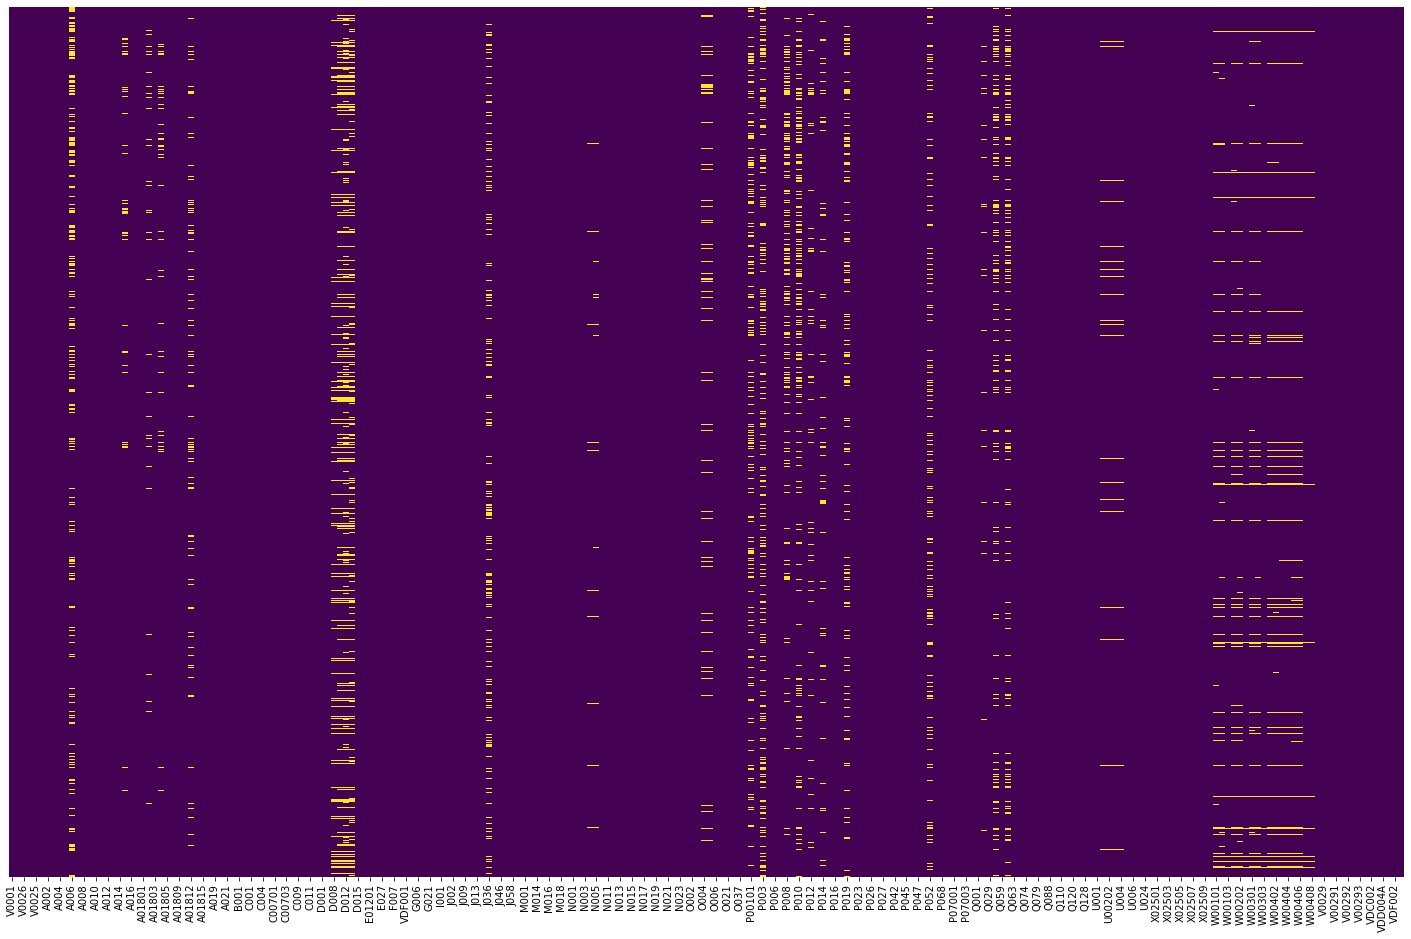

In [34]:
plt.figure(figsize=(25,16))
ax = sb.heatmap(df2.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
df2

,V0001,V0022,V0026,V0031,V0025,A001,A002,A003,A004,A005,...,V00292,V00283,V00293,VDC001,VDC002,VDD004,VDD004A,VDE001,VDF002,VDF003
0,Rondônia,Entre 2.0 e 4.0,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Entre 2.0 e 4.0,Menor que 2.0,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Menor que 1000.0,Menor que 356.0
1,Rondônia,Menor que 2.0,Urbano,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Menor que 2.0,Menor que 2.0,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Menor que 1000.0,Entre 356.0 e 1225.0
2,Rondônia,Entre 2.0 e 4.0,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,"""Cerâmica, lajota ou pedra""",Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Entre 2.0 e 4.0,Menor que 2.0,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas fora da força de trabalho,Maior que 3306.0,Maior que 1225.0
3,Rondônia,Menor que 2.0,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Menor que 2.0,Menor que 2.0,Fundamental completo ou equivalente,Fundamental completo ou equivalente,Pessoas fora da força de trabalho,Menor que 1000.0,Menor que 356.0
4,Rondônia,Entre 2.0 e 4.0,Urbano,Capital,Selecionada,Casa,Taipa não revestida,Telha,Cimento,Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Entre 2.0 e 4.0,Menor que 2.0,Sem instrução,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Entre 1000.0 e 3306.0,Entre 356.0 e 1225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60197,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Poço ou nascente fora da propriedade,...,Entre 86556.55 e 415795.2,Maior que 411.0,Maior que 41111.0,Entre 2.0 e 4.0,Menor que 2.0,Médio incompleto ou equivalente,Médio incompleto ou equivalente,Pessoas fora da força de trabalho,Entre 1000.0 e 3306.0,Entre 356.0 e 1225.0
60198,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Rede geral de distribuição,...,Entre 86556.55 e 415795.2,Maior que 411.0,Maior que 41111.0,Entre 2.0 e 4.0,Menor que 2.0,Fundamental completo ou equivalente,Fundamental completo ou equivalente,Pessoas na força de trabalho,Menor que 1000.0,Menor que 356.0
60199,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Rede geral de distribuição,...,Entre 86556.55 e 415795.2,Maior que 411.0,Maior que 41111.0,Entre 2.0 e 4.0,Menor que 2.0,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas na força de trabalho,Entre 1000.0 e 3306.0,Entre 356.0 e 1225.0
60200,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Rede geral de distribuição,...,Entre 86556.55 e 415795.2,Maior que 411.0,Maior que 41111.0,Entre 2.0 e 4.0,Menor que 2.0,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas na força de trabalho,Entre 1000.0 e 3306.0,Entre 356.0 e 1225.0


In [36]:
new_columns = [code_to_desc[col] for col in df2.columns.to_list()]
df2.columns = new_columns

In [37]:
df2

,[V0001] Unidade da Federação,[V0022] Total de moradores,[V0026] Tipo de situação censitária,[V0031] Tipo de área,[V0025] Seleção do morador de 18 anos ou mais para responder o questionário individual,[A001] Este domicílio é do tipo:,[A002] Qual o material que predomina na construção das paredes externas deste domicílio?,[A003] Qual o material que predomina na cobertura (telhado) do domicílio?,[A004] Qual o material que predomina no piso do domicílio?,[A005] Qual é a principal forma de abastecimento de água deste domicílio?,...,[V00292] Projeção da população para moradores selecionados,[V00283] Domínio de projeção para domicílio e moradores,[V00293] Domínio de projeção para morador selecionado,"[VDC001] ""Número de componentes do domicílio (exclusive as pessoas cuja condição na família era pensionista, empregado doméstico ou parente do empregado doméstico) """,[VDC002] Total de moradores com 18 anos ou mais,[VDD004] Nível de instrução mais elevado alcançado (pessoas de 5 anos ou mais de idade) - SISTEMA DE 8 ANOS,[VDD004A] Nível de instrução mais elevado alcançado (pessoas de 5 anos ou mais de idade) padronizado para o Ensino Fundamental - SISTEMA DE 9 ANOS,[VDE001] Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade,"[VDF002] ""Rendimento domiciliar (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)""","[VDF003] ""Rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)"""
0,Rondônia,Entre 2.0 e 4.0,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Entre 2.0 e 4.0,Menor que 2.0,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Menor que 1000.0,Menor que 356.0
1,Rondônia,Menor que 2.0,Urbano,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Menor que 2.0,Menor que 2.0,Fundamental incompleto ou equivalente,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Menor que 1000.0,Entre 356.0 e 1225.0
2,Rondônia,Entre 2.0 e 4.0,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,"""Cerâmica, lajota ou pedra""",Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Entre 2.0 e 4.0,Menor que 2.0,Médio completo ou equivalente,Médio completo ou equivalente,Pessoas fora da força de trabalho,Maior que 3306.0,Maior que 1225.0
3,Rondônia,Menor que 2.0,Urbano,Capital,Selecionada,Casa,Alvenaria sem revestimento,Telha,Cimento,Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Menor que 2.0,Menor que 2.0,Fundamental completo ou equivalente,Fundamental completo ou equivalente,Pessoas fora da força de trabalho,Menor que 1000.0,Menor que 356.0
4,Rondônia,Entre 2.0 e 4.0,Urbano,Capital,Selecionada,Casa,Taipa não revestida,Telha,Cimento,Poço ou nascente na propriedade,...,Menor que 86556.55,Menor que 221.0,Menor que 22123.0,Entre 2.0 e 4.0,Menor que 2.0,Sem instrução,Fundamental incompleto ou equivalente,Pessoas na força de trabalho,Entre 1000.0 e 3306.0,Entre 356.0 e 1225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60197,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionada,Casa,Alvenaria com revestimento,Telha,"""Cerâmica, lajota ou pedra""",Poço ou nascente fora da propriedade,...,Entre 86556.55 e 415795.2,Maior que 411.0,Maior que 41111.0,Entre 2.0 e 4.0,Menor que 2.0,Médio incompleto ou equivalente,Médio incompleto ou equivalente,Pessoas fora da força de trabalho,Entre 1000.0 e 3306.0,Entre 356.0 e 1225.0
60198,Distrito Federal,Entre 2.0 e 4.0,Rural,Capital,Selecionada,C

In [38]:
df2.to_csv('df_2013.csv', index=False)